# k-mean for intrusion detection system
---
    In anomaly detection, the k-means clustering algorithm is used to detect novel intrusions by clustering the network connections’ data to collect the most of intrusions together in one or more clusters.


## NSL-KDD dataset
    NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set.

In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv("kdd_train.csv")

#We will be taking only two variables from the data – “dst_host_diff_srv_rate” and “dst_host_same_src_port_rate”.
X = data[["dst_host_diff_srv_rate", "dst_host_same_src_port_rate"]]

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## determine k using the elbow method
    The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K.
    In the following code the KElbowVisualizer fits the KMeans model for a range of K values from 2 to 15 on our dataset.

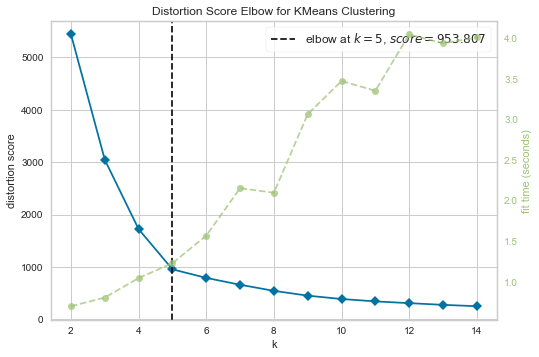

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Implement k-mean algorithm

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import time

data=pd.read_csv("kdd_train.csv")
X = data[["same_srv_rate","dst_host_same_srv_rate"]]
# number of clustres
K=5
# Select random observation as centroids
Centroids = (X.sample(n=K))
print(Centroids)

        same_srv_rate  dst_host_same_srv_rate
73929            1.00                    0.31
80836            0.33                    0.07
112332           0.15                    0.07
2816             1.00                    0.90
44993            0.50                    0.74


In [ ]:



diff = 1
j=0

print("\nClustering...\n")
start_time = time.time()

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["dst_host_same_srv_rate"]-row_d["dst_host_same_srv_rate"])**2
            d2=(row_c["same_srv_rate"]-row_d["same_srv_rate"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["same_srv_rate","dst_host_same_srv_rate"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['same_srv_rate'] - Centroids['same_srv_rate']).sum() + (Centroids_new['dst_host_same_srv_rate'] - Centroids['dst_host_same_srv_rate']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["same_srv_rate","dst_host_same_srv_rate"]]

print("\n\nRun Time ->","--- %s seconds ---" % (time.time() - start_time))
print("Data Successfully Clustered")

color=['blue','green','cyan', 'black', 'yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["dst_host_same_srv_rate"],data["same_srv_rate"],c=color[k])



Clustering...



<ipython-input-33-74e3019b5c1d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-33-74e3019b5c1d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-0.030376500342812342
-0.013264486394353105
-0.003892834956351364
-0.0007363121514396623
-0.00025813830524618053


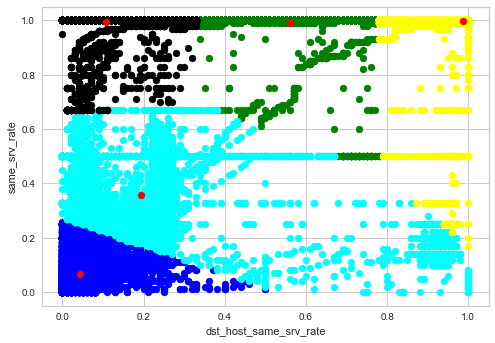

In [9]:
# print(Centroids)
# print(type(Centroids))

color=['blue','green','cyan','black', 'yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["dst_host_same_srv_rate"],data["same_srv_rate"],c=color[k])


plt.scatter(Centroids["dst_host_same_srv_rate"],Centroids["same_srv_rate"],c='red')
plt.xlabel('dst_host_same_srv_rate')
plt.ylabel('same_srv_rate')
plt.show()
# plt.scatter(X["dst_host_same_srv_rate"],X["same_srv_rate"],c='black')

       same_srv_rate  dst_host_same_srv_rate
0               1.00                    0.11
1               0.99                    0.80
2               1.00                    1.00
3               1.00                    0.01
4               1.00                    0.01
...              ...                     ...
22539           0.00                    0.00
22540           1.00                    1.00
22541           0.05                    0.10
22542           0.50                    0.00
22543           1.00                    1.00

[22544 rows x 2 columns]


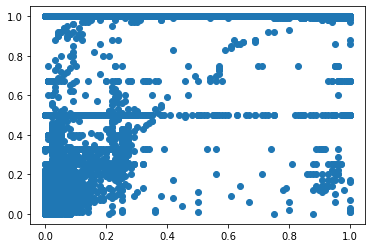

In [30]:
import matplotlib.pyplot as plt2
%matplotlib inline
test_data=pd.read_csv("kdd_test.csv")
X2 = test_data[["same_srv_rate","dst_host_same_srv_rate"]].copy()

plt2.scatter(test_data["dst_host_same_srv_rate"],test_data["same_srv_rate"], label='True Position')

print(X2)

In [31]:
import numpy as np

from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import euclidean_distances
# euc_res=euclidean_distances(np.array(Centroids), np.array(X2))


'''Calculate distance between centroids and all the test points'''
XD2=X2.copy()
i=1
for index1,row_c in Centroids.iterrows():
    ED2=[]
    for index2,row_d in XD2.iterrows():
        d12=(row_c["dst_host_same_srv_rate"]-row_d["dst_host_same_srv_rate"])**2
        d22=(row_c["same_srv_rate"]-row_d["same_srv_rate"])**2
        d2=np.sqrt(d12+d22)
        ED2.append(d2)
    X2[i]=ED2.copy()
    i=i+1

'''Find the shortest distance and attribute attribute the points to it'''
C2=[]
for index,row in X2.iterrows():
    min_dist2=row[1]
    pos2=1
    for i in range(K):
        if row[i+1] < min_dist2:
            min_dist2 = row[i+1]
            pos2=i+1
    C2.append(pos2) 
X2["Cluster"]=C2
X2["labels"] = test_data["labels"]

test_data["Cluster"]= C2
 
color=['blue','green','cyan','black', 'yellow'] 
for k in range(K):
    test_d=X2[X2["Cluster"]==k+1]
    plt2.scatter(test_d["dst_host_same_srv_rate"],test_d["same_srv_rate"],c=color[k])
    
plt2.scatter(Centroids["dst_host_same_srv_rate"],Centroids["same_srv_rate"],c='red')
plt2.xlabel('dst_host_same_srv_rate')
plt2.ylabel('dst_host_same_srv_rate')
plt2.show()


NameError: name 'Centroids' is not defined

In [27]:
predict_labels = []
i=0
for index, row in X2.iterrows():
    if(X2["Cluster"][i]== 4 or X2["Cluster"][i]== 5):
        predict_labels.append("normal")
    else:
        predict_labels.append("attack")
    i+=1
    
# print(X2["Cluster"][0])

X2["predict_lables"] = predict_labels
X2.head(40)

NameError: name 'X2' is not defined

In [34]:
accuracy = 0
i=0
for index, row in X2.iterrows():
    if(X2["labels"][i]!= 'normal' and X2["predict_lables"][i]== 'attack') or(X2["labels"][i]== 'normal' and X2["predict_lables"][i]== 'normal'):
        accouracy+=1
    i+=1
    
print(accuracy*100/(i+1))
    


18.314482146817475


In [15]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

data_k=pd.read_csv("kdd_test.csv")

#We will be taking only two variables from the data – “dst_host_diff_srv_rate” and “dst_host_same_src_port_rate”.
X_k = data_k[["dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]]


km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(X_k)

R = X_k.copy()
R["labels"] = data_k["labels"].copy()

R["predict_lables"] = y_predicted

In [16]:
# R.head(50)

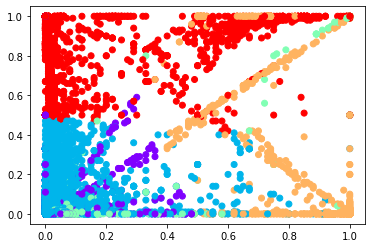

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X_k["dst_host_diff_srv_rate"],X_k["dst_host_same_src_port_rate"], c=km.labels_, cmap='rainbow')


In [25]:
predict_labels = []
i=0
for index, row in R.iterrows():
    if(R["predict_lables"][i]== 1 or R["predict_lables"][i]== 4):
        predict_labels.append("normal")
    else:
        predict_labels.append("attack")
    i+=1
    
# print(X2["Cluster"][0])

R["predict_lables_clr"] = predict_labels
R.head()

,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,predict_lables,predict_lables_clr
0,0.02,0.01,0.0,0.0,0.87,0.0,normal,1,normal
1,0.02,0.01,0.0,0.0,0.00,0.0,normal,1,normal
2,0.00,0.01,0.0,0.0,0.00,0.0,normal,1,normal
3,0.84,1.00,0.0,0.0,0.00,0.0,normal,4,normal
4,0.68,1.00,0.0,0.0,1.00,1.0,portsweep,3,attack


In [26]:
accuracy = 0
i=0
for index, row in R.iterrows():
    if(R["labels"][i]!= 'normal' and R["predict_lables_clr"][i]== 'attack') or(R["labels"][i]== 'normal' and R["predict_lables_clr"][i]== 'normal'):
        accuracy+=1
    i+=1
    
print(accuracy*100/(i+1))
    

84.23597249944555
